In [2]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'Gurgaon']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18396451,K Lab,1,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039310,28.424831,"Cafe, Beverages",...,Indian Rupees(Rs.),No,No,No,No,1,3.4,Orange,Average,16
1,18237941,Pind Balluchi,1,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039220,28.424913,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,2.7,Orange,Average,80
2,2787,Punjab Grill,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.3,Green,Very Good,1887
3,3431,Zambar,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.0,Green,Very Good,802
4,303699,Cakes & More,1,Gurgaon,"27, Ground Floor, Ansal Plaza Mall, Palam Viha...","Ansal Plaza Mall, Palam Vihar","Ansal Plaza Mall, Palam Vihar, Gurgaon",77.042009,28.511416,Bakery,...,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4


In [6]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [7]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [8]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",3.4,Average,16
1,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",2.7,Average,80
2,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",4.3,Very Good,1887
3,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",4.0,Very Good,802
4,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,3.0,Average,4


In [9]:
Gurgaon_Rest = folium.Map(location=[28.4595, 77.0266], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Gurgaon_Rest)  

Gurgaon_Rest

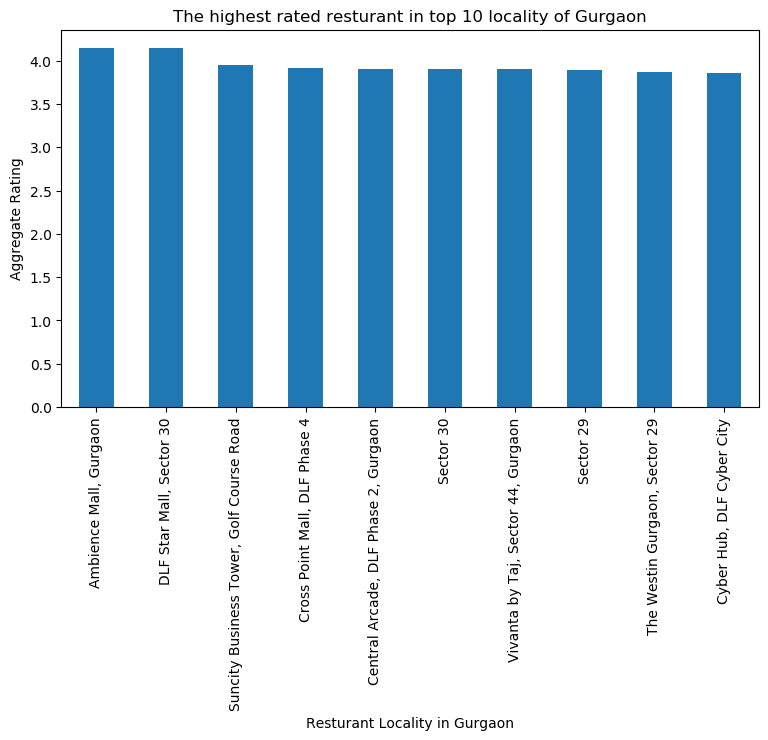

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

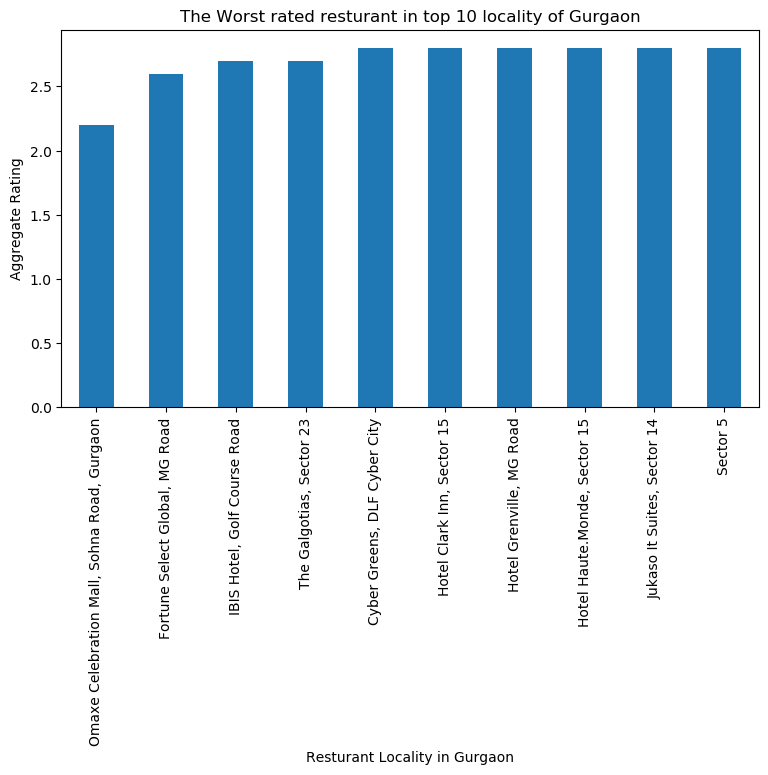

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Gurgaon')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

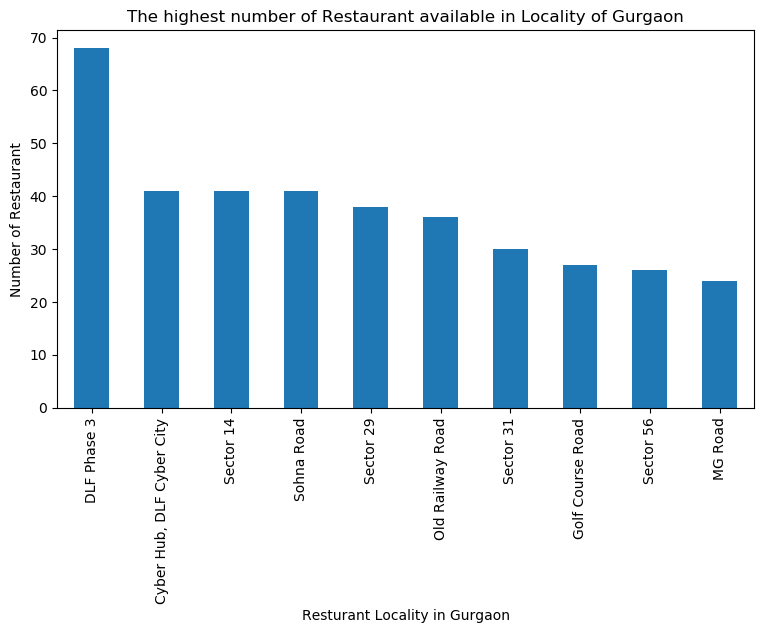

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

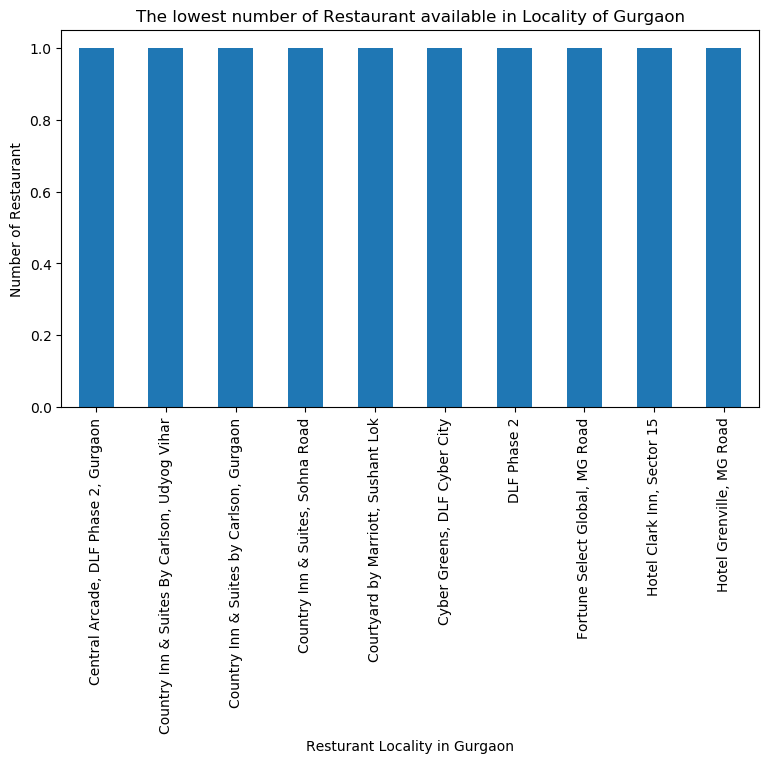

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Gurgaon')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

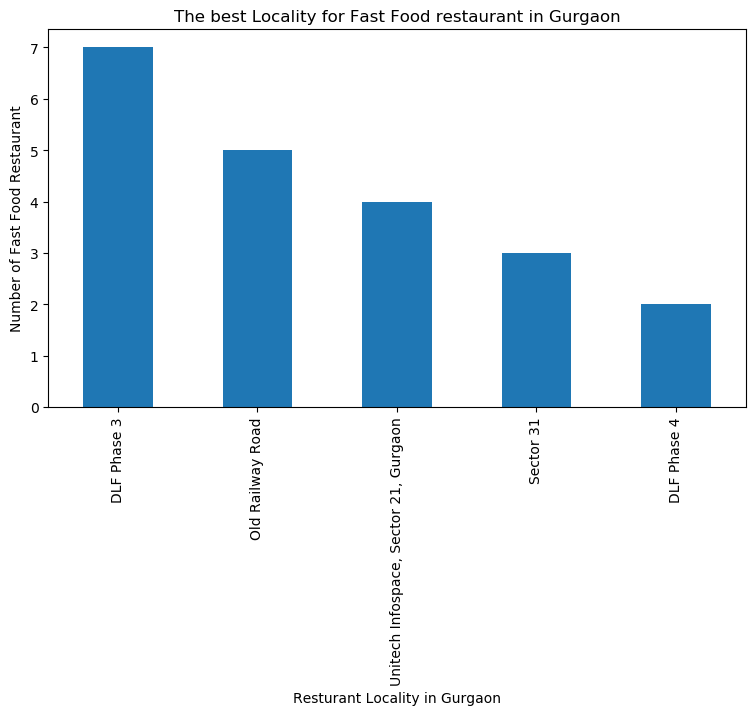

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for Fast Food restaurant in Gurgaon')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Fast Food')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Number of Fast Food Restaurant')

#displays the plot
plt.show()

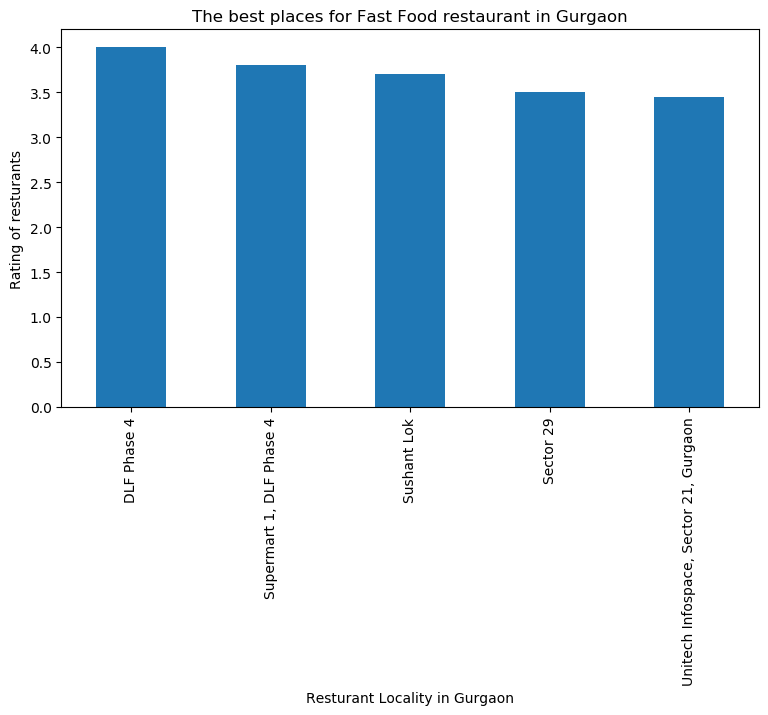

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Fast Food restaurant in Gurgaon')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Fast Food')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Gurgaon')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

In [24]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [25]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.05,Average,96
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.15,Very Good,2689
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery, Ice Cream, Chinese",3.00,Average,19
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",3.00,Average,65
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.85,Average,28


In [26]:
df_final.shape

(110, 8)

In [27]:
CLIENT_ID = '2QKAFSCLC0E3NH3XVVPQ1VEMJA1EHHH4QN0T1BTK2BT1LA2I' # your Foursquare ID
CLIENT_SECRET = 'G2KFGSDXXM1LRYGBGH4P5D3TLRUNEGMLYUZMEOQAKDARUFYT' # your Foursquare Secret
VERSION = '20191028'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2QKAFSCLC0E3NH3XVVPQ1VEMJA1EHHH4QN0T1BTK2BT1LA2I
CLIENT_SECRET:G2KFGSDXXM1LRYGBGH4P5D3TLRUNEGMLYUZMEOQAKDARUFYT


In [28]:

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
gurgaon_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

 ILD Trade Centre Mall, Sohna Road
Ambience Mall, Gurgaon
Ansal Plaza Mall, Palam Vihar
Ardee City
Best Western Skycity Hotel, Sector 15, Gurgaon
Central Arcade, DLF Phase 2, Gurgaon
Central Plaza Mall, Golf Course Road
Country Inn & Suites By Carlson, Udyog Vihar
Country Inn & Suites by Carlson, Gurgaon
Country Inn & Suites by Carlson, Sector 12
Country Inn & Suites, Sohna Road
Courtyard by Marriott, Sushant Lok
Cross Point Mall, DLF Phase 4
Crowne Plaza, Sector 29
Cyber Greens, DLF Cyber City
Cyber Hub, DLF Cyber City
DLF Cyber City
DLF Galleria, DLF Phase 4
DLF Mega Mall, DLF Phase 1
DLF Phase 1
DLF Phase 2
DLF Phase 3
DLF Phase 4
DLF Phase 5
DLF South Point Mall, Golf Course Road
DLF Star Mall, Sector 30
DT City Centre Mall, MG Road
DT Mega Mall, DLF Phase 1
DoubleTree by Hilton, Sector 56
Fortune Select Excalibur, Sohna Road
Fortune Select Global, MG Road
Global Foyer Mall, Golf Course Road
Golf Course Road
Hong Kong Bazaar Mall, Sector 57, Gurgaon
Hotel Clark Inn, Sector 15
Hotel

In [30]:
gurgaon_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Brewer Street,28.424499,77.039134,Brewery
1,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Decathlon Gurgaon,28.427433,77.036258,Sporting Goods Shop
2,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Sagar Ratna,28.421042,77.038509,Indian Restaurant
3,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,KFC,28.424789,77.038722,Fast Food Restaurant
4,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,Grand cinemas,28.423626,77.039422,Movie Theater


In [31]:
gurgaon_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"ILD Trade Centre Mall, Sohna Road",9,9,9,9,9,9
"Ambience Mall, Gurgaon",40,40,40,40,40,40
"Ansal Plaza Mall, Palam Vihar",4,4,4,4,4,4
Ardee City,4,4,4,4,4,4
"Best Western Skycity Hotel, Sector 15, Gurgaon",5,5,5,5,5,5
"Central Arcade, DLF Phase 2, Gurgaon",22,22,22,22,22,22
"Central Plaza Mall, Golf Course Road",13,13,13,13,13,13
"Country Inn & Suites By Carlson, Udyog Vihar",4,4,4,4,4,4
"Country Inn & Suites by Carlson, Gurgaon",13,13,13,13,13,13


In [32]:
print('There are {} uniques categories.'.format(len(gurgaon_venues['Venue Category'].unique())))

There are 128 uniques categories.


In [33]:
## Analyze Each Locality

# one hot encoding
gurgaon_onehot = pd.get_dummies(gurgaon_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
gurgaon_onehot['Locality'] = gurgaon_venues['Locality'] 

# move Locality column to the first column
column_list = gurgaon_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
gurgaon_onehot = gurgaon_onehot[column_list]

gurgaon_onehot.head()

,Locality,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Burmese Restaurant,Bus Station,Business Service,Cable Car,Café,Campground,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Dairy Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,General Entertainment,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Light Rail Station,Lighting Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music School,New American Restaurant,Nightclub,Nightlife Spot,Office,Outdoors & Recreation,Park,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Tibetan Restaurant,Trail,Whisky Bar,Wine Bar
0,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"ILD Trade Centre Mall, Sohna Road",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
gurgaon_grouped = gurgaon_onehot.groupby('Locality').mean().reset_index()
gurgaon_grouped

,Locality,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Burmese Restaurant,Bus Station,Business Service,Cable Car,Café,Campground,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Dairy Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,General Entertainment,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Light Rail Station,Lighting Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music School,New American Restaurant,Nightclub,Nightlife Spot,Office,Outdoors & Recreation,Park,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Tibetan Restaurant,Trail,Whisky Bar,Wine Bar
0,"ILD Trade Centre Mall, Sohna Road",0.000000,0.000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.222222,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
1,"Ambience Mall, Gurgaon",0.050000,0.025,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.025,0.025000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.050000,0.00,0.000000,0.000000,0.000000,0.050000,0.025000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.025000,0.025000,0.0000,0.000000,0.000000,0.075000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.0000,0.000000,0.025000,0.000000,0.000000,0.00,0.000000,0.150000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.0,0.000000,0.025000,0.000000,0.050000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.025,0.050000,0.00,0.025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [35]:
gurgaon_grouped.shape

(110, 129)

In [36]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in gurgaon_grouped['Locality']:
    print("----"+hood+"----")
    temp = gurgaon_grouped[gurgaon_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- ILD Trade Centre Mall, Sohna Road----
                  venue  freq
0               Brewery  0.22
1         Movie Theater  0.22
2             BBQ Joint  0.11
3  Fast Food Restaurant  0.11
4   Sporting Goods Shop  0.11


----Ambience Mall, Gurgaon----
                  venue  freq
0     Indian Restaurant  0.15
1  Fast Food Restaurant  0.08
2   American Restaurant  0.05
3                   Bar  0.05
4                  Café  0.05


----Ansal Plaza Mall, Palam Vihar----
                venue  freq
0         Pizza Place  0.25
1                Café  0.25
2                Food  0.25
3      Sandwich Place  0.25
4  Miscellaneous Shop  0.00


----Ardee City----
               venue  freq
0  Convenience Store  0.25
1    Thai Restaurant  0.25
2  Indian Restaurant  0.25
3        Beer Garden  0.25
4       Music School  0.00


----Best Western Skycity Hotel, Sector 15, Gurgaon----
                       venue  freq
0                      Hotel   0.6
1           Asian Restaurant   0.2
2          

                  venue  freq
0         Shopping Mall   0.2
1    Italian Restaurant   0.1
2        Breakfast Spot   0.1
3                  Café   0.1
4  Fast Food Restaurant   0.1


----Qutab Plaza, DLF Phase 1----
               venue  freq
0               Café  0.18
1  Indian Restaurant  0.18
2              Hotel  0.09
3        Pizza Place  0.09
4             Office  0.09


----Raheja Mall, Sohna Road----
                  venue  freq
0     Indian Restaurant  0.23
1               Brewery  0.15
2  Fast Food Restaurant  0.15
3    Chinese Restaurant  0.08
4      Department Store  0.08


----Ramada Gurgaon Central, Sector 44----
         venue  freq
0        Hotel  0.33
1          Gym  0.17
2         Café  0.17
3  Snack Place  0.17
4   Food Truck  0.17


----Sadar Bazar----
                  venue  freq
0                 Hotel  0.25
1  Fast Food Restaurant  0.25
2                Market  0.25
3            Donut Shop  0.25
4        Nightlife Spot  0.00


----Sahara Mall, MG Road----
      

In [37]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = gurgaon_grouped['Locality']

for ind in np.arange(gurgaon_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(gurgaon_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",Movie Theater,Brewery,Indian Restaurant,Sporting Goods Shop,Fast Food Restaurant,Department Store,BBQ Joint,Farmers Market,Falafel Restaurant,Electronics Store
1,"Ambience Mall, Gurgaon",Indian Restaurant,Fast Food Restaurant,Bar,Multiplex,Clothing Store,Café,Italian Restaurant,Shopping Mall,American Restaurant,Asian Restaurant
2,"Ansal Plaza Mall, Palam Vihar",Food,Pizza Place,Sandwich Place,Café,Diner,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop,Wine Bar
3,Ardee City,Convenience Store,Thai Restaurant,Beer Garden,Indian Restaurant,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Food & Drink Shop
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",Hotel,Asian Restaurant,Farmers Market,Wine Bar,Donut Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dim Sum Restaurant
5,"Central Arcade, DLF Phase 2, Gurgaon",Department Store,Indian Restaurant,Shopping Mall,American Restaurant,Fast Food Restaurant,Mexican Restaurant,Donut Shop,Coffee Shop,Clothing Store,Pizza Place
6,"Central Plaza Mall, Golf Course Road",Chinese Restaurant,Falafel Restaurant,Italian Restaurant,Hookah Bar,Hotel,Sandwich Place,Ice Cream Shop,Café,Diner,Wine Bar
7,"Country Inn & Suites By Carlson, Udyog Vihar",Hotel,Clothing Store,Fast Food Restaurant,Campground,Wine Bar,Diner,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop
8,"Country Inn & Suites by Carlson, Gurgaon",Hotel,Japanese Restaurant,Indian Restaurant,Go Kart Track,Resort,Café,Diner,Farmers Market,Falafel Restaurant,Electronics Store
9,"Country Inn & Suites by Carlson, Sector 12",Hotel,Indian Restaurant,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop,Wine Bar


In [40]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

gurgaon_clustering = gurgaon_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(gurgaon_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(110,)

In [41]:
# add clustering labels
gurgaon_merged = df_final.head(240)
gurgaon_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
gurgaon_merged = gurgaon_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

gurgaon_merged.head()

C:\Users\nasta\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"ILD Trade Centre Mall, Sohna Road",28.424872,77.039265,2,"Cafe, Beverages, North Indian, Mughlai",3.05,Average,96,4,Movie Theater,Brewery,Indian Restaurant,Sporting Goods Shop,Fast Food Restaurant,Department Store,BBQ Joint,Farmers Market,Falafel Restaurant,Electronics Store
1,"Ambience Mall, Gurgaon",28.502845,77.097152,2,"North Indian, Mughlai, South Indian, Seafood, ...",4.15,Very Good,2689,4,Indian Restaurant,Fast Food Restaurant,Bar,Multiplex,Clothing Store,Café,Italian Restaurant,Shopping Mall,American Restaurant,Asian Restaurant
2,"Ansal Plaza Mall, Palam Vihar",28.511460,77.041994,3,"Bakery, Ice Cream, Chinese",3.00,Average,19,1,Food,Pizza Place,Sandwich Place,Café,Diner,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop,Wine Bar
3,Ardee City,28.441660,77.083050,3,"Japanese, Thai, Chinese, Pizza, Desserts, Raw ...",3.00,Average,65,4,Convenience Store,Thai Restaurant,Beer Garden,Indian Restaurant,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Food & Drink Shop
4,"Best Western Skycity Hotel, Sector 15, Gurgaon",28.458165,77.034839,2,"Japanese, North Indian, Chinese, Continental",2.85,Average,28,2,Hotel,Asian Restaurant,Farmers Market,Wine Bar,Donut Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dim Sum Restaurant


In [42]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(gurgaon_merged['Lat'], gurgaon_merged['Lng'], gurgaon_merged['Locality'], gurgaon_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [43]:
## Examine Clusters

## Cluster 1
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 0, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
100,28.239367,3.55,"Average, Good",67,0,Indian Restaurant,Wine Bar,Food,Convenience Store,Dairy Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner


In [44]:
## Examine Clusters

## Cluster 2
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 1, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,28.511460,3.000000,Average,19,1,Food,Pizza Place,Sandwich Place,Café,Diner,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop,Wine Bar
6,28.443040,3.500000,"Average, Good, Very Good",1214,1,Chinese Restaurant,Falafel Restaurant,Italian Restaurant,Hookah Bar,Hotel,Sandwich Place,Ice Cream Shop,Café,Diner,Wine Bar
7,28.509225,3.500000,Good,32,1,Hotel,Clothing Store,Fast Food Restaurant,Campground,Wine Bar,Diner,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop
11,28.460925,3.200000,Average,6,1,Hotel,Indian Restaurant,Restaurant,Café,Sandwich Place,Juice Bar,Diner,Fast Food Restaurant,Gym,Dessert Shop
12,28.468311,3.912500,"Good, Very Good",1841,1,Café,Indian Restaurant,Bakery,Coffee Shop,Sandwich Place,Italian Restaurant,American Restaurant,Beer Garden,Fast Food Restaurant,Restaurant
17,28.467327,3.582353,"Average, Good, Poor, Very Good",3208,1,Café,Indian Restaurant,Bakery,Coffee Shop,Sandwich Place,Italian Restaurant,American Restaurant,Beer Garden,Fast Food Restaurant,Restaurant
22,28.466065,3.804762,"Average, Good, Very Good",3414,1,Café,Restaurant,Italian Restaurant,Indian Restaurant,Coffee Shop,Bakery,Chinese Restaurant,Plaza,Market,Lounge
23,28.448633,3.675000,"Average, Good",214,1,Coffee Shop,Hotel,Nightclub,Chinese Restaurant,Pizza Place,Lounge,Café,Japanese Restaurant,Italian Restaurant,Indian Restaurant
24,28.447905,3.706667,"Average, Good, Very Good",2920,1,American Restaurant,Beer Garden,Nightclub,Chinese Restaurant,Falafel Restaurant,Pizza Place,Lounge,Café,Japanese Restaurant,Italian Restaurant
25,28.461636,4.150000,Very Good,306,1,Multiplex,Coffee Shop,Brewery,Chinese Restaurant,Hotel,Tea Room,Badminton Court,Bakery,Restaurant,South Indian Restaurant


In [45]:
## Examine Clusters

## Cluster 3
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 2, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,28.458165,2.8500,Average,28,2,Hotel,Asian Restaurant,Farmers Market,Wine Bar,Donut Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dim Sum Restaurant
8,28.461988,3.8000,Good,91,2,Hotel,Japanese Restaurant,Indian Restaurant,Go Kart Track,Resort,Café,Diner,Farmers Market,Falafel Restaurant,Electronics Store
9,28.468385,3.2500,"Average, Good",44,2,Hotel,Indian Restaurant,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop,Wine Bar
10,28.334942,3.4000,Average,19,2,Hotel,Wine Bar,Food,Convenience Store,Dairy Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
34,28.457610,2.8000,Average,7,2,Hotel,Asian Restaurant,Farmers Market,Wine Bar,Donut Shop,Flea Market,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dim Sum Restaurant
35,28.465600,2.8000,Average,15,2,Hotel,Bed & Breakfast,Wine Bar,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Diner
45,28.470510,3.0000,Average,35,2,Hotel,Indian Restaurant,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Donut Shop,Wine Bar
57,28.459079,3.2000,Average,13,2,Hotel,Market,Dessert Shop,Farmers Market,Wine Bar,Dairy Store,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner
65,28.463685,3.0000,Average,12,2,Hotel,Dessert Shop,Market,Bus Station,Wine Bar,Electronics Store,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
67,28.457396,2.9600,Average,99,2,Hotel,Asian Restaurant,Department Store,Wine Bar,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store


In [46]:
## Examine Clusters

## Cluster 4

gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 3, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
103,28.503476,3.023077,Average,153,3,Gym,Wine Bar,Food,Convenience Store,Dairy Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner


In [47]:
## Examine Clusters

## Cluster 5
gurgaon_merged.loc[gurgaon_merged['Cluster Labels'] == 4, gurgaon_merged.columns[[1] + list(range(5, gurgaon_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,28.424872,3.050000,Average,96,4,Movie Theater,Brewery,Indian Restaurant,Sporting Goods Shop,Fast Food Restaurant,Department Store,BBQ Joint,Farmers Market,Falafel Restaurant,Electronics Store
1,28.502845,4.150000,Very Good,2689,4,Indian Restaurant,Fast Food Restaurant,Bar,Multiplex,Clothing Store,Café,Italian Restaurant,Shopping Mall,American Restaurant,Asian Restaurant
3,28.441660,3.000000,Average,65,4,Convenience Store,Thai Restaurant,Beer Garden,Indian Restaurant,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Food & Drink Shop
5,28.480759,3.900000,Good,415,4,Department Store,Indian Restaurant,Shopping Mall,American Restaurant,Fast Food Restaurant,Mexican Restaurant,Donut Shop,Coffee Shop,Clothing Store,Pizza Place
13,28.468424,3.800000,Good,312,4,Brewery,Indian Restaurant,Café,Chinese Restaurant,Fast Food Restaurant,Bar,Brazilian Restaurant,Nightclub,Coffee Shop,Park
14,28.493723,2.800000,Average,191,4,Indian Restaurant,Coffee Shop,Café,Asian Restaurant,Pizza Place,Fast Food Restaurant,Bar,American Restaurant,Donut Shop,Mediterranean Restaurant
15,28.495004,3.860976,"Average, Excellent, Good, Poor, Very Good",36185,4,Indian Restaurant,Coffee Shop,Café,Asian Restaurant,Pizza Place,Bar,Fast Food Restaurant,American Restaurant,Mexican Restaurant,Mediterranean Restaurant
16,28.492075,3.460000,"Average, Good, Poor, Very Good",1241,4,Indian Restaurant,Café,Coffee Shop,Fast Food Restaurant,Pizza Place,Bar,American Restaurant,Mediterranean Restaurant,Lounge,Donut Shop
18,28.475867,3.007143,"Average, Good, Poor",1033,4,Fast Food Restaurant,Coffee Shop,Health & Beauty Service,Restaurant,Indian Restaurant,Food Court,Electronics Store,Department Store,Multiplex,Music School
19,28.472881,3.352174,"Average, Excellent, Good",2651,4,Fast Food Restaurant,Coffee Shop,Health & Beauty Service,Restaurant,Indian Restaurant,Food Court,Electronics Store,Metro Station,Department Store,Multiplex
